# Task1A: Generate dataset from make_circles

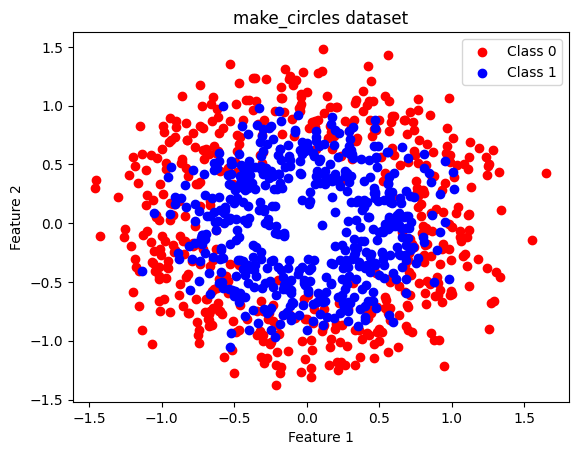

Distribution of Class 0:      50.0 %
Distribution of Class 1:      50.0 %
Mean of features: -3.6787248617746296e-05
Standard deviation of features: 0.6161566633207803


In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

# Generate dataset
X, y = make_circles(n_samples=1000, random_state=0, noise=0.2, factor=0.6)

# Plot
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title("make_circles dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Calculate and print results
print("Distribution of Class 0:     ", (np.sum(y == 0) / len(y)) * 100, "%")
print("Distribution of Class 1:     ", (np.sum(y == 1) / len(y)) * 100, "%")
print("Mean of features:", np.mean(X))
print("Standard deviation of features:", np.std(X))


# Task1B: Generate dataset from make_blobs

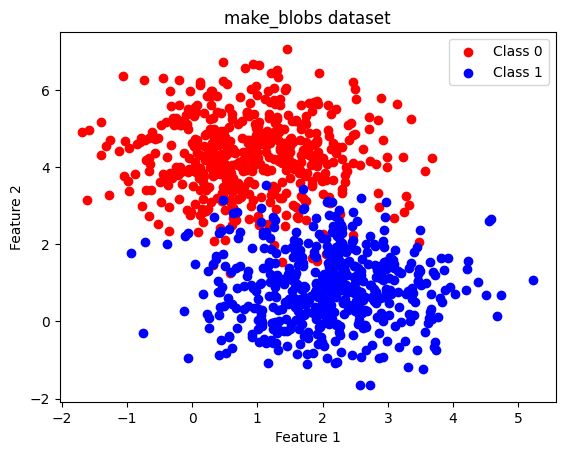

Distribution of Class 0:      50.0 %
Distribution of Class 1:      50.0 %
Mean of features: 2.0376567775661902
Standard deviation of features: 1.6888936374399497


In [2]:
from sklearn.datasets import make_blobs

# Generate dataset
X, y = make_blobs(n_samples=1000, centers=2, cluster_std=1.0, n_features=2, random_state=0)

# Plot
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title("make_blobs dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Calculate and print results
print("Distribution of Class 0:     ", (np.sum(y == 0) / len(y)) * 100, "%")
print("Distribution of Class 1:     ", (np.sum(y == 1) / len(y)) * 100, "%")
print("Mean of features:", np.mean(X))
print("Standard deviation of features:", np.std(X))


# Task2A: Function that re-shuffles and splits the dataset into two portions

In [3]:
from sklearn.utils import shuffle

def train_test_split(X, y, test_size=0.2):
    # Shuffle our dataset
    X, y = shuffle(X, y, random_state=0)
    
    # Calculate number of data points in the test set
    test_size = int(X.shape[0] * test_size)
    
    # Split dataset
    X_train = X[:-test_size]
    X_test = X[-test_size:]
    y_train = y[:-test_size]
    y_test = y[-test_size:]
    
    return X_train, X_test, y_train, y_test

def test_train_test_split(): # Testing the function developed
    # Creating a small synthetic dataset
    X, y = np.arange(100).reshape((50, 2)), np.arange(50)
    
    # Then splitting the dataset using our function
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Verify the sizes of the splits
    assert len(X_train) == 40, "X_train size is incorrect"
    assert len(X_test) == 10, "X_test size is incorrect"
    assert len(y_train) == 40, "y_train size is incorrect"
    assert len(y_test) == 10, "y_test size is incorrect"
    
    print("test passed!")

test_train_test_split()

test passed!


# Task2B: Function that computes and returns the classification accuracy, recall, precision and F1-score for a binary classification task 

In [4]:
def classification_metrics(y_true, y_pred):
    tp = fp = tn = fn = 0
    
    for true, pred in zip(y_true, y_pred):
        if true == 1 and pred == 1:
            tp += 1
        elif true == 1 and pred == 0:
            fn += 1
        elif true == 0 and pred == 1:
            fp += 1
        elif true == 0 and pred == 0:
            tn += 1
            
    # Calculate metrics
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1_score': f1_score}

import unittest

class TestClassificationMetrics(unittest.TestCase): # I made 3 here to test each case
    def test_perfect_classification(self):
        y_true = [0, 1, 0, 1]
        y_pred = [0, 1, 0, 1]
        expected = {'accuracy': 1.0, 'recall': 1.0, 'precision': 1.0, 'f1_score': 1.0}
        self.assertEqual(classification_metrics(y_true, y_pred), expected)
    
    def test_poor_classification(self):
        y_true = [0, 1, 0, 1]
        y_pred = [1, 0, 1, 0]
        expected = {'accuracy': 0.0, 'recall': 0.0, 'precision': 0.0, 'f1_score': 0.0}
        self.assertEqual(classification_metrics(y_true, y_pred), expected)
    
    def test_mixed_classification(self):
        y_true = [0, 1, 1, 0]
        y_pred = [0, 1, 0, 1]
        expected = {'accuracy': 0.5, 'recall': 0.5, 'precision': 0.5, 'f1_score': 0.5}
        self.assertEqual(classification_metrics(y_true, y_pred), expected)

# Load and run the tests
loader = unittest.TestLoader()
suite = loader.loadTestsFromTestCase(TestClassificationMetrics)
runner = unittest.TextTestRunner(verbosity=2)
runner.run(suite)

test_mixed_classification (__main__.TestClassificationMetrics) ... ok
test_perfect_classification (__main__.TestClassificationMetrics) ... ok
test_poor_classification (__main__.TestClassificationMetrics) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

# Task3A: Splitting the dataset into a train set and test set in the ratio 80%/20% respectively

In [10]:
X, y = make_circles(n_samples=1000, random_state=0, noise=0.2, factor=0.6)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X, y, test_size=0.2)

X2, y2 = make_blobs(n_samples=1000, centers=2, cluster_std=1.0, n_features=2, random_state=0)
X_train_blobs, X_test_blobs, y_train_blobs, y_test_blobs = train_test_split(X2, y2, test_size=0.2)

# Task3B/C: Find the best k that maximises the F1-score and accuracy

In [11]:
from sklearn.neighbors import KNeighborsClassifier

def find_best_k(X_train, y_train, X_test, y_test):
    best_f1_score = 0
    best_accuracy = 0
    best_k_f1 = 1
    best_k_accuracy = 1
    
    for k in range(1, 50):  
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        
        metrics = classification_metrics(y_test, y_pred)
        
        if metrics['f1_score'] > best_f1_score:
            best_f1_score = metrics['f1_score']
            best_k_f1 = k
            
        if metrics['accuracy'] > best_accuracy:
            best_accuracy = metrics['accuracy']
            best_k_accuracy = k
            
    return best_k_f1, best_k_accuracy, best_f1_score, best_accuracy

best_k_f1_circles, best_k_accuracy_circles, best_f1_score_circles, best_accuracy_circles = find_best_k(X_train_circles, y_train_circles, X_test_circles, y_test_circles)
best_k_f1_blobs, best_k_accuracy_blobs, best_f1_score_blobs, best_accuracy_blobs = find_best_k(X_train_blobs, y_train_blobs, X_test_blobs, y_test_blobs)

print(f"Best k for F1-score (make_circles): {best_k_f1_circles} with F1-score: {best_f1_score_circles}")
print(f"Best k for accuracy (make_circles): {best_k_accuracy_circles} with accuracy: {best_accuracy_circles}")

print(f"Best k for F1-score (make_blobs): {best_k_f1_blobs} with F1-score: {best_f1_score_blobs}")
print(f"Best k for accuracy (make_blobs): {best_k_accuracy_blobs} with accuracy: {best_accuracy_blobs}")

Best k for F1-score (make_circles): 16 with F1-score: 0.8571428571428572
Best k for accuracy (make_circles): 16 with accuracy: 0.855
Best k for F1-score (make_blobs): 9 with F1-score: 0.9693877551020408
Best k for accuracy (make_blobs): 7 with accuracy: 0.97


# Task4A: Time Complexity Analysis of k-NN Search Methods

## Objective

The purpose of this experiment is to compare the inference time of two search methods used in the k-Nearest Neighbors (k-NN) algorithm—brute force search and kdTree search—across various training set sizes.

## Method

1. **Generate Synthetic Datasets**: Synthetic datasets of different sizes will be created to serve as our training data.
2. **Model Training**: For each dataset size, we will train two k-NN models using scikit-learn: one employing the brute force search method and the other utilizing the kdTree search method.
3. **Inference Time Measurement**: The time taken by each model to make predictions on a fixed number of test samples will be measured and recorded. This step aims to evaluate the computational efficiency of the two search methods during inference.

## Variables

- **Independent Variable**: The size of the training dataset. This variable will be systematically varied to observe its impact on the inference time of the models.
- **Dependent Variable**: The inference time for each search method. This is our primary outcome measure, indicating the computational efficiency of each method under varying conditions.
- **Control Variable**: The number of test samples will be kept constant across all experiments. This control ensures that any observed differences in inference time can be attributed to the training set size rather than variations in the size of the test set.

## Expected Outcomes
The experiment is designed to observe the differences in the scalability and efficiency of the two methods. The expected outcome is that intially brute force search will perform better, but with larger datasets the kdTree search will perform much better.


# Task 4B: Implement the experiment in python and extract the results

Dataset size: 100, Brute prediction time: 0.0012 seconds, kdTree prediction time: 0.0190 seconds
Dataset size: 1000, Brute prediction time: 0.0053 seconds, kdTree prediction time: 0.0169 seconds
Dataset size: 10000, Brute prediction time: 0.0084 seconds, kdTree prediction time: 0.0133 seconds
Dataset size: 25000, Brute prediction time: 0.0120 seconds, kdTree prediction time: 0.0132 seconds
Dataset size: 50000, Brute prediction time: 0.0200 seconds, kdTree prediction time: 0.0131 seconds
Dataset size: 100000, Brute prediction time: 0.0342 seconds, kdTree prediction time: 0.0136 seconds
Dataset size: 200000, Brute prediction time: 0.0602 seconds, kdTree prediction time: 0.0135 seconds


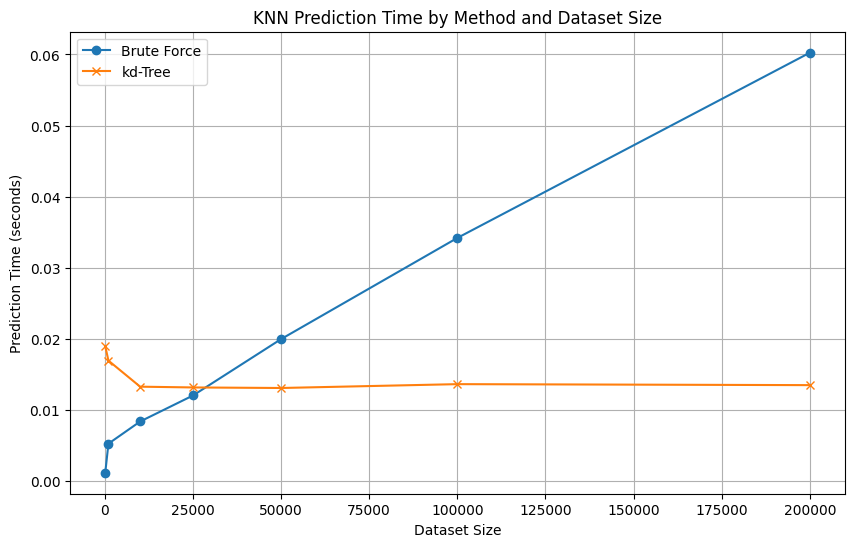

In [12]:
import time

# Fixed number of test samples
num_test_samples = 1000

X_test, y_test = make_blobs(n_samples=num_test_samples, centers=2, cluster_std=1.0, n_features=2, random_state=7)

# Dataset sizes to test
dataset_sizes = [100, 1000, 10000, 25000, 50000, 100000, 200000]

# Array for our results
results = []

for size in dataset_sizes:
    # Generate training dataset
    X_train, y_train = make_blobs(n_samples=size, centers=2, n_features=2, random_state=7)
    
    # Brute force method
    knn_brute = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
    knn_brute.fit(X_train, y_train)
    start_time = time.time()
    knn_brute.predict(X_test)
    brute_time = time.time() - start_time
    
    # kdTree method
    knn_kdtree = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
    knn_kdtree.fit(X_train, y_train)
    start_time = time.time()
    knn_kdtree.predict(X_test)
    kdtree_time = time.time() - start_time
    
    # Store results
    results.append((size, brute_time, kdtree_time))

# Print results
for size, brute_time, kdtree_time in results:
    print(f"Dataset size: {size}, Brute prediction time: {brute_time:.4f} seconds, kdTree prediction time: {kdtree_time:.4f} seconds")

# Plotting
sizes, brute_times, kdtree_times = zip(*results)
plt.figure(figsize=(10, 6))
plt.plot(sizes, brute_times, label='Brute Force', marker='o')
plt.plot(sizes, kdtree_times, label='kd-Tree', marker='x')
plt.xlabel('Dataset Size')
plt.ylabel('Prediction Time (seconds)')
plt.title('KNN Prediction Time by Method and Dataset Size')
plt.legend()
plt.grid(True)
plt.show()

# Task4C
## Discussion of Experiment Outcomes

The experiment performed aimed to exclusively compare the prediction time of brute force and kdTree search methods in the k-NN algorithm across various sizes of training datasets. The results reveal a clear trend in performance differences between the two methods as the dataset size increases, which is as expected in our 'Expected Outcomes' subsection in section 4A:

- At the smallest dataset size (100), brute force search was substantially faster than kdTree.
- As the dataset size grew, the brute force method's prediction time increased gradually but remained faster than the kdTree method up to a dataset size of 25,000.
- Starting from a dataset size of 25,000, the kdTree method began to show its efficiency advantage, performing relatively the same as brute force.
- At the largest dataset sizes tested (50,000 to 200,000), the kdTree method consistently outperformed the brute force search, with the gap in prediction time widening. The kdTree method maintained approximately the same prediction time (~0.014 seconds) from 50,000 to 200,000 dataset sizes, whereas brute force prediction time continued to increase significantly with the dataset size.

### Correlation with Theoretical Analysis

The experimental outcomes align well with theoretical expectations for both search methods:

1. **Brute Force Search Efficiency at Small Scale**: True to theoretical predictions, the brute force method showed superior performance at smaller dataset sizes. This method involves a straightforward computation comparing the query instance against every instance in the training set, which is less computationally intensive when the dataset is small.

2. **kdTree Efficiency at Larger Scale**: The kdTree search method, designed to organize data in a manner that significantly reduces the search space for queries, demonstrated its theoretical advantage as the dataset size increased. While the initial overhead for kdTree structure construction is not reflected in the prediction times, the method's efficiency for larger datasets is evident, with prediction times stabilizing as dataset size increases, showcasing its scalability.

### Conclusion

This experiment's findings vividly illustrate the importance of selecting the appropriate search method based on the dataset size for k-NN algorithm implementations. While the brute force method may be preferable for smaller datasets due to its lower computational overhead, the kdTree method's structured approach to data significantly enhances prediction efficiency for larger datasets, underscoring the trade-off between computational simplicity and scalability in search method selection.
